In [ ]:
# https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the uploaded CSV file to examine its contents.
file_path = 'shopping_trends.csv'
shopping_trends_data = pd.read_csv(file_path)

In [40]:
# Display the first few rows
shopping_trends_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [41]:
# summary information of the dataset
shopping_trends_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [61]:
# Check for null values
shopping_trends_data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Age Group                   0
dtype: int64

In [64]:
# Summary of average purchase amount by category and season
category_season_summary = shopping_trends_data.groupby(['Category', 'Season'])['Purchase Amount (USD)'].agg(['mean', 'median', 'count']).reset_index()
category_season_summary.to_csv("table1.csv", index=False)
category_season_summary

,Category,Season,mean,median,count
0,Accessories,Fall,61.339506,62.0,324
1,Accessories,Spring,56.501661,56.0,301
2,Accessories,Summer,60.987179,63.0,312
3,Accessories,Winter,60.366337,60.0,303
4,Clothing,Fall,61.405152,61.0,427
5,Clothing,Spring,60.995595,62.0,454
6,Clothing,Summer,56.563725,55.0,408
7,Clothing,Winter,60.879464,63.0,448
8,Footwear,Fall,63.713235,64.0,136
9,Footwear,Spring,58.619632,58.0,163


In [65]:
# Average purchase amount by age group (binning age into groups)
shopping_trends_data['Age Group'] = pd.cut(
    shopping_trends_data['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['Under 18', '18-30', '31-45', '46-60', 'Above 60']
)
age_group_summary = shopping_trends_data.groupby('Age Group')['Purchase Amount (USD)'].agg(['mean', 'median', 'count']).reset_index()
age_group_summary.to_csv("table2.csv", index=False)
age_group_summary

C:\Users\anish\AppData\Local\Temp\ipykernel_13776\1356254897.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = shopping_trends_data.groupby('Age Group')['Purchase Amount (USD)'].agg(['mean', 'median', 'count']).reset_index()


,Age Group,mean,median,count
0,Under 18,59.985507,62.0,69
1,18-30,60.386364,61.0,880
2,31-45,59.402562,59.0,1093
3,46-60,59.657269,59.0,1135
4,Above 60,59.701245,59.0,723


In [44]:
# Frequency of purchases by gender and subscription status
gender_subscription_summary = shopping_trends_data.groupby(['Gender', 'Subscription Status'])['Frequency of Purchases'].value_counts(normalize=True).rename('percentage').reset_index()
gender_subscription_summary

,Gender,Subscription Status,Frequency of Purchases,percentage
0,Female,No,Bi-Weekly,0.150641
1,Female,No,Every 3 Months,0.149038
2,Female,No,Annually,0.148237
3,Female,No,Monthly,0.148237
4,Female,No,Weekly,0.137821
5,Female,No,Quarterly,0.135417
6,Female,No,Fortnightly,0.130609
7,Male,No,Quarterly,0.158849
8,Male,No,Every 3 Months,0.152595
9,Male,No,Annually,0.141964


In [45]:
# Review rating vs discount applied
review_discount_summary = shopping_trends_data.groupby(['Discount Applied'])['Review Rating'].agg(['mean', 'median', 'count']).reset_index()
review_discount_summary

,Discount Applied,mean,median,count
0,No,3.757715,3.8,2223
1,Yes,3.739654,3.7,1677


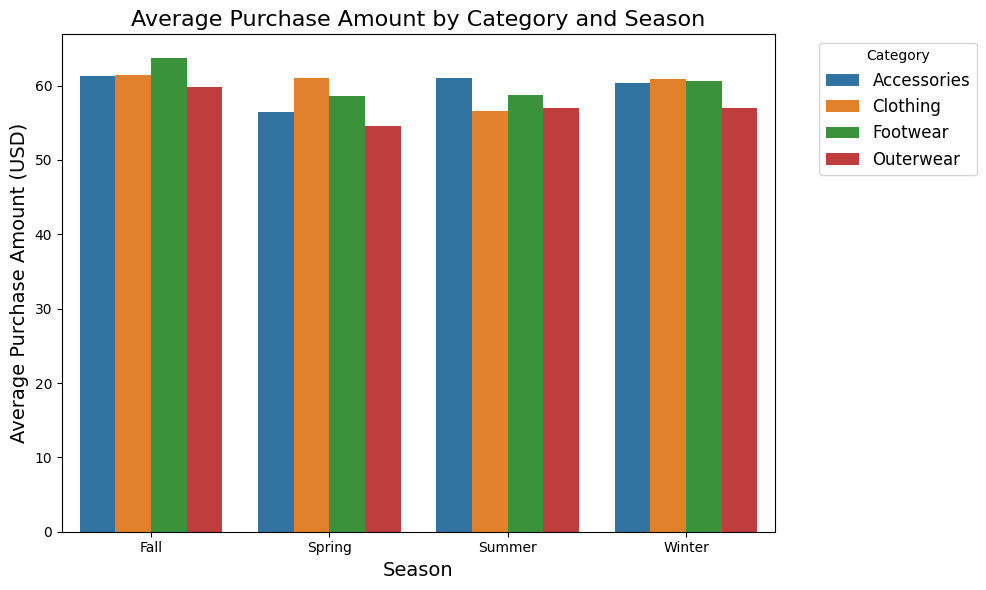

In [66]:
# Plot for Purchase by category and season
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_season_summary,
    x="Season",
    y="mean",
    hue="Category"
)
plt.title("Average Purchase Amount by Category and Season", fontsize=16)
plt.xlabel("Season", fontsize=14)
plt.ylabel("Average Purchase Amount (USD)", fontsize=14)
plt.legend(title="Category", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

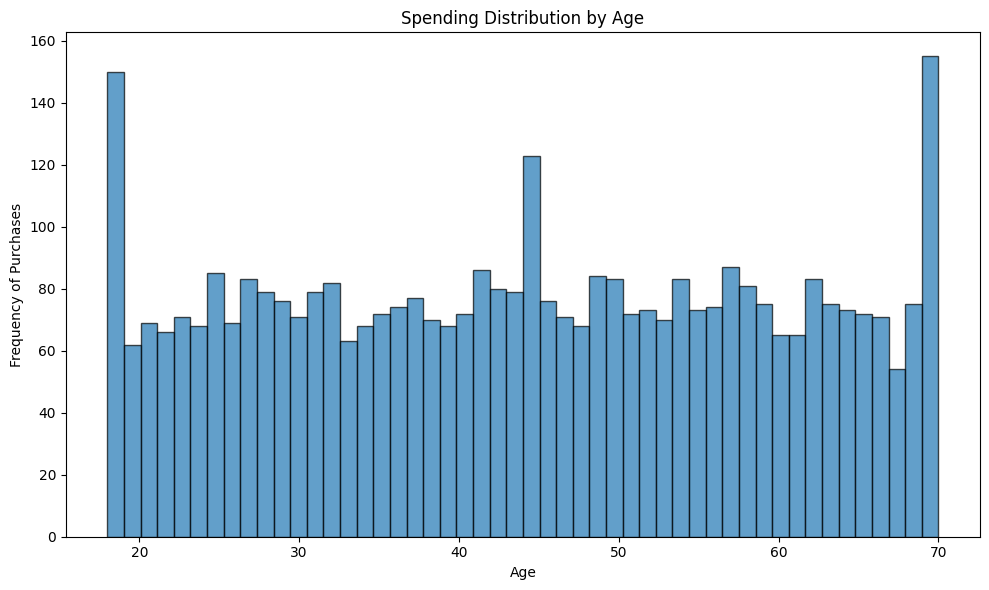

In [52]:
# Hist plot speding distribution by age
plt.figure(figsize=(10, 6))
plt.hist(shopping_trends_data['Age'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Spending Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchases')
plt.tight_layout()
plt.show()

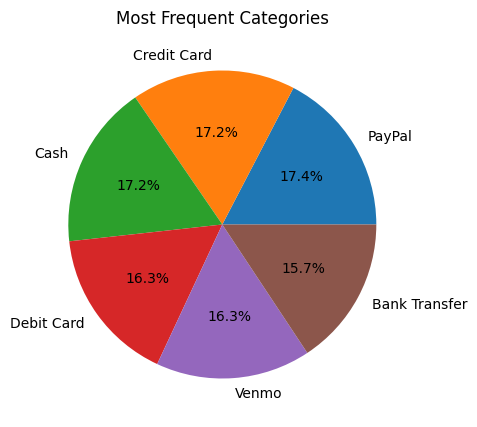

In [ ]:
# Get the most frequent categories in the 'Category' column
shopping_trends_data['Preferred Payment Method'].value_counts().plot.pie(figsize=(5, 5), autopct='%.1f%%')

# Adding title and customizing the plot
plt.title("Most Frequent Categories")
plt.xticks(rotation=90)
plt.ylabel('')
# Show the plot
plt.show()

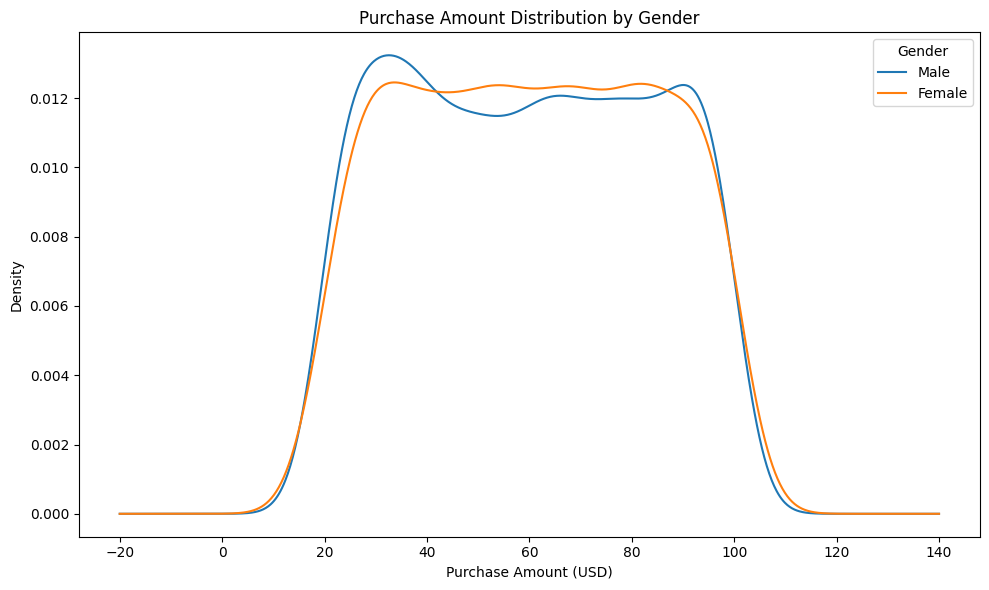

In [38]:
# Plot for purchase by gender
plt.figure(figsize=(10, 6))
for gender in shopping_trends_data['Gender'].unique():
    subset = shopping_trends_data[shopping_trends_data['Gender'] == gender]
    subset['Purchase Amount (USD)'].plot(kind='kde', label=gender)
plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()